
***
<font color="red" size=16>
<b>
IMPORTANT: Follow the instructions <a href=https://docs.google.com/document/d/1sNKn4h7KHFNOAYACBEKg6ZJv3e3tO11eBCDoQrwkZ6o/edit?usp=sharing> here </a> before proceeding.
</b>
</font>

Refer to the [lecture](https://docs.google.com/presentation/d/1WKT6VJEJRw5Nj5WFY8JzJeylll5CJouY/edit?usp=sharing&ouid=104372831378835219489&rtpof=true&sd=true) on using Google Colab for help working with Python notebooks.

***

# **Introduction to Space Biology Data Notebook**

In this notebook, we will be exploring [phenotypic](https://www.genome.gov/genetics-glossary/Phenotype) data that were collected during the NASA [Rodent Research 9 mission (RR9)](https://www.nasa.gov/ames/space-biosciences/rodent-research-9-spacex-12/). The goal of this scientific mission to the International Space Station was to study the effects of spaceflight on the eye and vision by collecting data on rodents flown in space. We will be using data from the following [NASA Open Science Data Repository](https://osdr.nasa.gov/bio/) RR9 datasets:
1. [OSD-557](https://osdr.nasa.gov/bio/repo/data/studies/OSD-557)
2. [OSD-568](https://osdr.nasa.gov/bio/repo/data/studies/OSD-568)
3. [OSD-583](https://osdr.nasa.gov/bio/repo/data/studies/OSD-583)

These phenotypic datasets include data from several biological measurements including [microcomputed tomography](https://en.wikipedia.org/wiki/X-ray_microtomography) (OSD-557), [immunostaining microscopy](https://en.wikipedia.org/wiki/Immunofluorescence) (OSD-568), and [tonometry](https://en.wikipedia.org/wiki/Ocular_tonometry) (OSD-583).  All measurements were collected on both ground control and spaceflight rodent samples and converted to tabular format to enable data accessibility.

## **Scientific Background on the RR9 Mission**

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/d/d1/Rodent_Research-9_Mission_Patch.jpg" width="200"/>
</div>

The [RR9 mission](https://www.nasa.gov/ames/space-biosciences/rodent-research-9-spacex-12/) flew 3 NASA Space Biology experiments to the International Space Station. The scientific goal of these experiments was to assess the effects of microgravity on different biological systems.

One experiment studied the effect of spaceflight on fluid shifts and the increased fluid pressures in the head, which contribute to visual impairment. The second experiment studied the effect of spaceflight on blood vessels in the eyes. The third experiment studied the effect of spaceflight on knee and hip joint degradation.

## **Spaceflight Associated Neuro-ocular Syndrome (SANS)**

The RR9 mission focused heavily on ocular and vision effects because previous work has shown that fluid shifts and other physiological changes contribute to visual impairment in spaceflight.

Collectively, changes in vision in spaceflight are referred to as [Spaceflight Associated Neuro-ocular Syndrome (SANS)](https://www.nature.com/articles/s41526-020-0097-9). As shown in the image below, SANS can affect different parts of the eye through different mechanisms including swelling of the eye or the optic nerve.

<div>
<img src="https://www.mdpi.com/life/life-13-01263/article_deploy/html/images/life-13-01263-g006-550.jpg" width="300"/>
</div>

*Image citation: https://www.mdpi.com/2075-1729/13/6/1263*


> **We will be using the data from the RR9 mission to study the effects of spaceflight on rodent eye and retina.**

## **Sample types**
There are 3 types of samples that we will encounter in the RR9 datasets: spaceflight, ground control, and cohort control.  The spaceflight samples were flown in space to the ISS, spent some time on the ISS, and then were either sacrificed on the ISS and were returned to Earth live.  The ground control samples have identical conditions (cage, diet, light, humidity, temperature, etc) except for being kept on the ground.  The cohort control samples are additional ground control samples that were leveraged due to a hurricane flooding the laboratory housing the ground control samples. For the sake of this and subsequent notebooks, we can combine ground control with cohort samples.

## **Basic statistical analysis**
In this notebook, we will use statistical analysis tools to explore all the data from RR9 that pertains to the effect of spaceflight on the eye.


We will be using the [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test), [Wilcoxon signed-rank test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test), and [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) to determine the significance of the difference of the distributions of the various data between ground and spaceflight samples.

We will also be plotting a [box-and-whisker plot](https://en.wikipedia.org/wiki/Box_plot) distinguishing space flight from ground samples for each of the measures taken in these studies.

We will show statistical results which include all the samples and those results which exclude some of the samples.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**QUESTIONS**

Based on your reading of [Spaceflight Associated Neuro-ocular Syndrome (SANS)](https://www.nature.com/articles/s41526-020-0097-9), answer the following questions.

1. What is one clinical sign of SANS?

2. What is one of the current theories of the pathogenesis of SANS?

3. Does SANS induce a hyperopic shift or myopic shift in the focal point?

**Double click here to enter your answers to the questions in this text box.**

1.swelling of eye

2.rise in intracranial pressure (ICP) from cephalad fluid shifts during LDSF

3.hyperopic shift

# **Read In Methods**

Here we are reading in methods from the `methods.ipynb` notebook that you copied into your Google Drive. You will be prompted to allow this notebook access to your Google Drive in order to read in the methods.  Make sure to respond to all the prompts.  The code in this cell may take a few minutes to run, so be patient.

Install and import the import_ipynb module enabling the import of methods from remote notebooks, mount your google drive to this notebook, and import the methods from the methods.ipynb notebook




In [4]:
%%capture
!pip install import_ipynb
import import_ipynb
from google.colab import drive
drive.flush_and_unmount()
drive.mount("mnt")
m = __import__("mnt/MyDrive/Colab Notebooks/methods1")

# **OSD-557 Data Exploration**

The [OSD-557 dataset](https://osdr.nasa.gov/bio/repo/data/studies/OSD-557) contains measurements from 10 male mice that were flown on board the International Space Station during the RR9 mission for 35 days. This dataset also contains data from two sets of control mice. The 10 "Ground Control" mice were housed on the ground for the duration of the flight in cages that replicate the spaceflight cages; while the 10 "Vivarium Control" mice were housed on the ground in the standard mouse vivarium cages to control for variability in housing. The eyes from each mouse were collected for analysis after return to Earth and euthanasia.


## **Explore the microCT data from OSD-557**

First, we will be exploring the *micro-computed tomography* (microCT) data from the OSD-557 dataset.  [microCT](https://en.wikipedia.org/wiki/X-ray_microtomography) is a method that uses X-rays to create cross-sections of a physical object that can be used to recreate a 3D model of the object. This 3D model can be used to measure different aspects of the object. In this dataset, we will be examining measurements of the following parts of the mouse eye:

* Anterior-Posterior (Ant-Post) - top to bottom
* Superior-Inferior (Sup-Inf) - front to back
* [Retina](https://en.wikipedia.org/wiki/Retina)
* Retina pigment layer (Pigment)
* [Choroid](https://en.wikipedia.org/wiki/Choroid)
* [Sclera](https://en.wikipedia.org/wiki/Sclera)

The researchers measured changes in each of these parts of the eye in order to compare them between the flight and control mice, to see whether spaceflight causes changes in the size of these parts of the eye. For example, the figure below shows how the researchers generated the measurements above from the 3D model of the "F10" mouse (the 10th spaceflown mouse).

![](https://cloudfront.jove.com/files/ftp_upload/61227/61227fig02.jpg)

*Figure citation: https://www.jove.com/t/61227/assessment-global-ocular-structure-following-spaceflight-using-micro*

**QUESTIONS**

1. Which type of radiation is used in microCT?

2. What does "Sup-Inf" and "Ant-Post" mean in anatomy?

3. Which format of the microCT data is used for data mining such as in this notebook - raw images or transformed tabular results?

**Double click here to enter your answers to the questions in this text box.**

1.X-rays

2.Anterior-Posterior (Ant-Post) - top to bottom and Superior-Inferior (Sup-Inf) - front to back

3.transformed tabular results


____

First, we will read in the microCT measurement data, using the `read_phenotype_data()` function defined in the `methods.ipynb` notebook. After reading in, the microCT dataset is stored in a Python `pandas` dataframe. We use the function `head()` to print the first 5 rows of the dataframe to the screen. Each row represents a different mouse eye sample, and each column holds the measurement values for different parts of the eye.

Define data dictionary for notebook and read in the micro ct data from OSD-557



In [5]:
data=dict()
data['microCT'] = m.read_phenotype_data('557', 'LSDS-1_microCT_MicroCT_Transformed_Reusable_Results')
print('num records: ', len(data['microCT']))
print('treatments: ', set(data['microCT']['Treatment']))
data['microCT'].head()

num records:  12
treatments:  {'Vivarium', 'Flight', 'Ground Control'}


,Source Name,Sample Name,Treatment,Ant-Post,Sup-Inf,Retina,Pigment Layer,Choroid,Sclera,Ant-Post.1,Right-left,Retina.1,Pigment Layer.1,Choroid.1,Sclera.1
0,F10,F10_Mouse_Eye,Flight,1.765000,2.044000,0.077,0.038,0.041000,0.059000,1.748000,1.997000,0.144000,0.051000,0.041000,0.073000
1,F12,F12_Mouse_Eye,Flight,1.724000,2.028000,0.091,0.048,0.036000,0.054000,1.720000,1.980000,0.087000,0.041000,0.039000,0.057000
2,F13,F13_Mouse_Eye,Flight,1.754333,2.043667,0.089,0.044,0.036333,0.054333,1.750333,1.969667,0.113667,0.053667,0.038333,0.065333
3,F14,F14_Mouse_Eye,Flight,1.774000,2.059000,0.099,0.046,0.032000,0.050000,1.783000,1.932000,0.110000,0.069000,0.035000,0.066000
4,V10,V10_Mouse_Eye,Vivarium,1.771000,2.119000,0.145,0.076,0.083000,0.109000,1.755000,2.089000,0.118000,0.055000,0.061000,0.067000


*We will examine the differences between ground and spaceflight samples for the distributions of Ant-Post, Sup-Inf, Retina, Pigment Layer, Sclera, and Choroid columns.  Note the use of the term "Treatment" here refers to the condition of the sample.  "Flight" = spaceflight, "Ground Control" = ground using flight cages, "Vivarium" = ground using standard mouse cages.*

The field names without the `.1` suffix represent data from images taken in the sagital view and the fields with the `.1` suffix represent data from images taken in the axial view.  

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Human_anatomy_planes%2C_labeled.svg/1200px-Human_anatomy_planes%2C_labeled.svg.png" width="300"/>
</div>

*Figure citation: https://en.wikipedia.org/wiki/Anatomical_plane*

Next, we will create [box-and-whisker plots](https://en.wikipedia.org/wiki/Box_plot) comparing the flight samples to the non-flight samples (Ground Control and Vivarium) for each measurement, using the `plotbox_and_stats()` function defined in the `methods.ipynb` notebook. This function deploys the `boxplot` function from the `matplotlib` Python library, and uses the statistical testing functions from the `scipy` Python library.

We will perform the statistical [t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) to test if there is a significant difference between the flight and non-flight samples.  We print a [p-value](https://en.wikipedia.org/wiki/P-value) to the screen to indicate the significance of the comparison.

> [A p-value of <0.05 is generally accepted as statistically significant. ](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4111019/)

We will then perform the same statistical test, but this time we will compare only the flight and the ground control samples, excluding the vivarium samples.

**Review the plots and p-value statistics for each of the following measurements, then answer the questions.**

### **Anterior-Posterior Measurement**

Plot a box plot and get stats for the Ant-Post field of the micro CT data for ground and spaceflight samples


field:  Ant-Post
excluding samples:  []
{'Ant-Post': {'t-test p-value': 0.14175}}
n flight =  4
n nonflight =  8


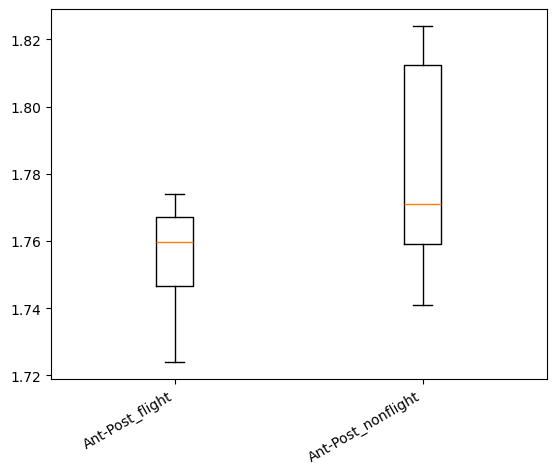

field:  Ant-Post.1
excluding samples:  []
{'Ant-Post.1': {'t-test p-value': 0.49605}}
n flight =  4
n nonflight =  8


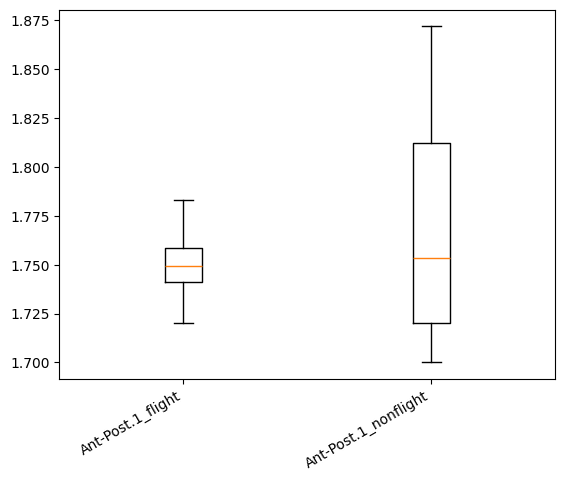

In [6]:
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Ant-Post', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Ant-Post.1', treatment='Treatment', space='Flight', exclude_samples=[])

### **Superior-Inferior Measurement**
Plot a box plot for the Sup-Inf field of the micro CT data for ground and spaceflight samples (note there is no Sup-Inf.1 measurement)


field:  Sup-Inf
excluding samples:  []
{'Sup-Inf': {'t-test p-value': 0.52282}}
n flight =  4
n nonflight =  8


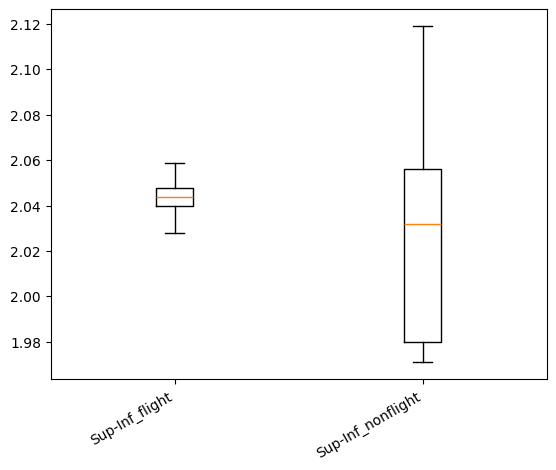

In [7]:
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Sup-Inf', treatment='Treatment', space='Flight', exclude_samples=[])

### **Retina Measurement**

The `Retina` field is the measurement for the left eye, and the `Retina.1` field is the measurement for the right eye. Plot a box plot for the Retina field of the micro CT data for ground and spaceflight samples

field:  Retina
excluding samples:  []
{'Retina': {'t-test p-value': 0.00796}}
n flight =  4
n nonflight =  8


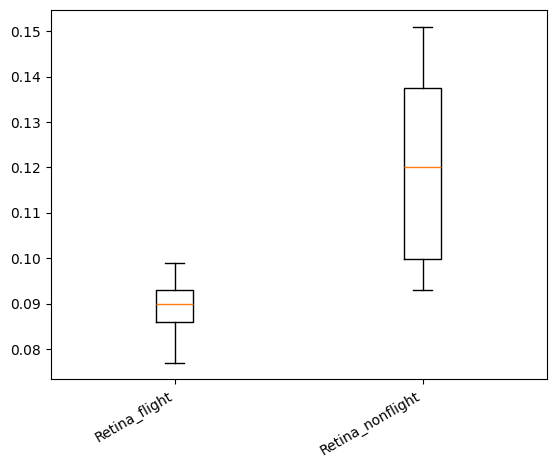

field:  Retina.1
excluding samples:  []
{'Retina.1': {'t-test p-value': 0.82328}}
n flight =  4
n nonflight =  8


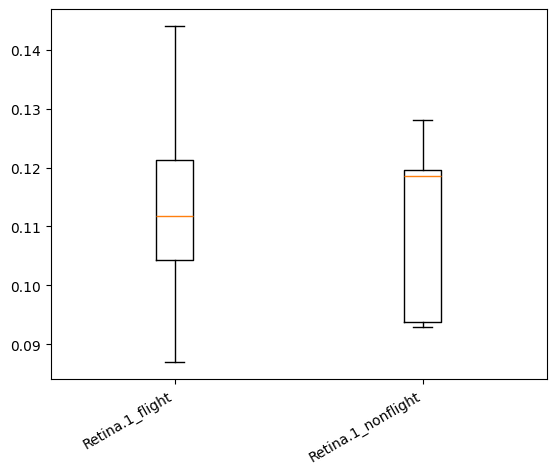

In [8]:
m.plotbox_and_stats(data_=data['microCT'],  sample_key = 'Source Name', field='Retina', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'],  sample_key = 'Source Name', field='Retina.1', treatment='Treatment', space='Flight', exclude_samples=[])

### **Pigment layer Measurement**

The `Pigment Layer` field is the measurement for the left eye, and the `Pigmen Layer.1` field is the measurement for the right eye. Plot a box plot for the Pigment Layer field of the micro CT data for ground and spaceflight samples


field:  Pigment Layer
excluding samples:  []
{'Pigment Layer': {'t-test p-value': 0.01535}}
n flight =  4
n nonflight =  8


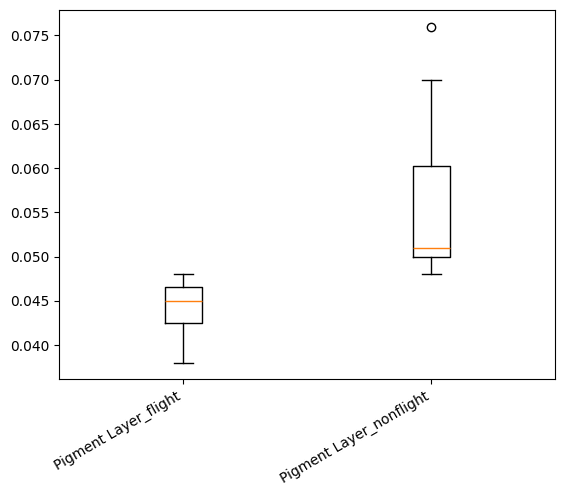

field:  Pigment Layer.1
excluding samples:  []
{'Pigment Layer.1': {'t-test p-value': 0.98999}}
n flight =  4
n nonflight =  8


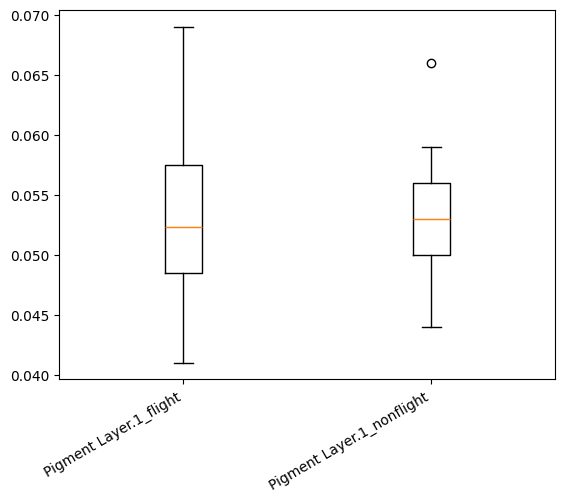

In [9]:
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Pigment Layer', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Pigment Layer.1', treatment='Treatment', space='Flight', exclude_samples=[])

### **Choroid Measurement**

The `Choroid` field is the measurement for the left eye, and the `Choroid.1` field is the measurement for the right eye.  Plot a box plot for the Choroid field of the micro CT data for ground and spaceflight samples


field:  Choroid
excluding samples:  []
{'Choroid': {'t-test p-value': 0.01249}}
n flight =  4
n nonflight =  8


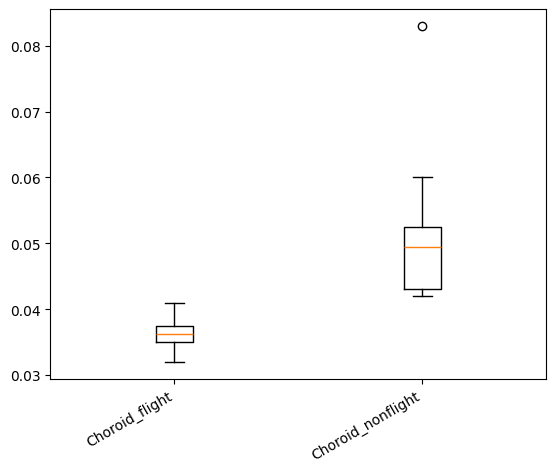

field:  Choroid.1
excluding samples:  []
{'Choroid.1': {'t-test p-value': 0.00862}}
n flight =  4
n nonflight =  8


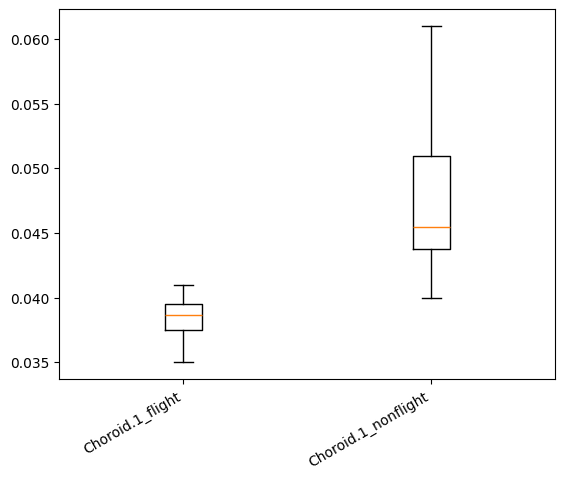

In [10]:
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Choroid', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Choroid.1', treatment='Treatment', space='Flight', exclude_samples=[])

### **Sclera Measurement**

The `Sclera` field is the measurement for the left eye, and the `Sclera.1` field is the measurement for the right eye.  Plot a box plot for the Sclera field of the micro CT data for ground and spaceflight samples


field:  Sclera
excluding samples:  []
{'Sclera': {'t-test p-value': 0.0026}}
n flight =  4
n nonflight =  8


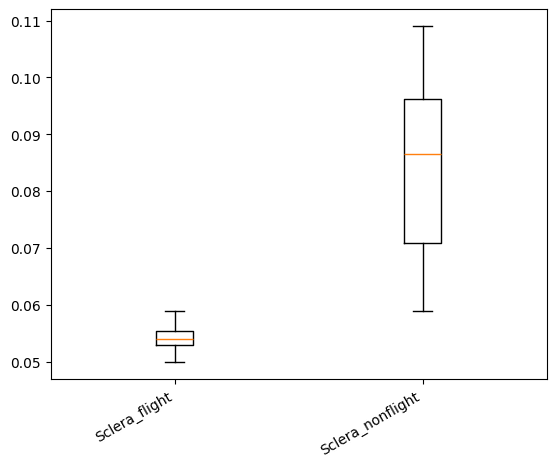

field:  Sclera.1
excluding samples:  []
{'Sclera.1': {'t-test p-value': 0.18301}}
n flight =  4
n nonflight =  8


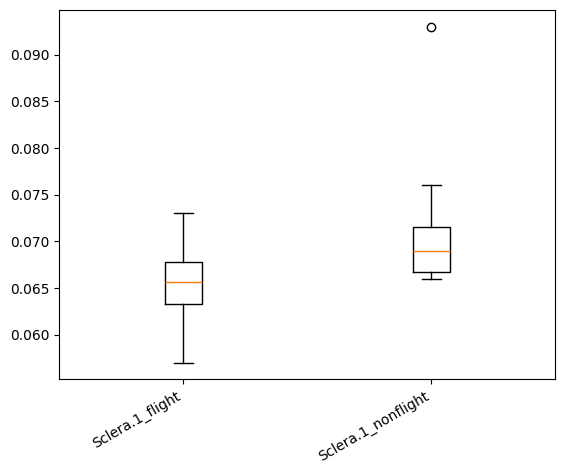

In [11]:
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Sclera', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Sclera.1', treatment='Treatment', space='Flight', exclude_samples=[])

**QUESTIONS**

1. Which measurements had a statistically significant difference in distribution between flight and ground samples for all 3 tests?

2. Based on the statistical tests we did on the microCT data, which measurement seems to have the most prominent distinction between space flight and ground samples?

3. What are reasons to include or exclude samples from the Vivarium treatment?

**Double click here to enter your answers to the questions in this text box.**

1.Retina, Pigment layer, choroid and sclera of left eye had significant difference from that of right eye

2.Retina and sclera had significant differences

3.Vivarium experiments are kind of simulated experiments. Here, we have space vs ground so we dont need simulated for now. we want to check differences between flight vs ground controls

## **Explore the Immunostaining Microscopy from OSD-557**

Next, we will explore the [immunostaining microscopy](https://en.wikipedia.org/wiki/Immunostaining) data from OSD-557. Immunostaining microscopy helps scientists find specific proteins in cells using colored stains that mark the proteins of interest.

### **Explore the immunostaining HNE data**

[HNE or hydroxynonenal](https://en.wikipedia.org/wiki/4-Hydroxynonenal) is a colorless oil that is produced by lipid oxidation.  It is found in animal tissues in higher quantities during [oxidative stress](https://en.wikipedia.org/wiki/Oxidative_stress).  It is considered a possible causal agent of numerous diseases including chronic inflammation, neurodegenerative disorders, and cancer. Spaceflight causes photoreceptor degradation and oxidative stress. Immunofluorescence staining for HNE marker is red.

<div>
<img src="https://www.researchgate.net/publication/344420533/figure/fig1/AS:11431281244427146@1715921478389/Cellular-oxidative-damage-in-the-cortex-and-hippocampus-4-HNE-positive-staining-was_Q320.jpg" width="400"/>
</div>


For each section on the retina slide, they selected 5 areas for counting.  These 5 areas were used subsequently in their quantitative analysis.

`sumcount`: total HNE positive cells in these five regions.

`sumEC`: total HNE positive endothelial cells in the same five regions.

`sunarea`: total areas for these five regions.

`dentotal`: HNE positive cell density.

`denEC`: HNE positive Endothelial cell density.

Read in the HNE data


In [12]:
data['immunoHNE'] = m.read_phenotype_data('557', 'LSDS-1_immunostaining_microscopy_HNEtr_Transformed_Reusable_Results')
print('num records: ', len(data['immunoHNE']))
print('sample names: ', list(data['immunoHNE']['Sample Name']))
data['immunoHNE'].head()

num records:  23
sample names:  ['F15_Mouse_Eye', 'F16_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'GC15_Mouse_Eye', 'GC16_Mouse_Eye', 'GC17_Mouse_Eye', 'GC18_Mouse_Eye', 'GC19_Mouse_Eye', 'Viv15_Mouse_Eye', 'Viv16_Mouse_Eye', 'Viv17_Mouse_Eye', 'Viv18_Mouse_Eye', 'Viv19_Mouse_Eye', 'Viv20_Mouse_Eye', 'CC2_15_Mouse_Eye', 'CC2_16_Mouse_Eye', 'CC2_17_Mouse_Eye', 'CC2_18_Mouse_Eye', 'CC2_19_Mouse_Eye', 'CC2_20_Mouse_Eye']


,Source Name,Sample Name,sumcount,sumEC,sunarea,dentotal,denEC
0,F15,F15_Mouse_Eye,124,24,1.149408,107.881593,20.880308
1,F16,F16_Mouse_Eye,97,28,0.946872,102.442566,29.571050
2,F17,F17_Mouse_Eye,159,28,0.875718,181.565290,31.973762
3,F18,F18_Mouse_Eye,90,23,0.650403,138.375660,35.362669
4,F19,F19_Mouse_Eye,106,15,1.086317,97.577417,13.808125


*We will examine differences between the ground and spaceflight samples for the distribution of data in the sumcount, sumeEC, sunarea, dentotal, and denEC columns.*

Plot a box plot for the sumcount field of the immuno HNE data for ground and spaceflight samples


field:  sumcount
excluding samples:  []
{'sumcount': {'t-test p-value': 0.00523}}
n flight =  6
n nonflight =  17


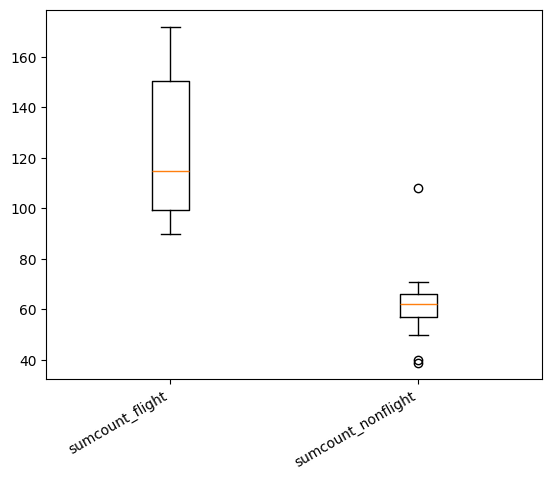

In [13]:
m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='sumcount', treatment=None, space=None, exclude_samples=[])

Plot a box plot for the dentotal field of the immuno HNE data for ground and spaceflight samples


field:  dentotal
excluding samples:  []
{'dentotal': {'t-test p-value': 0.00218}}
n flight =  6
n nonflight =  17


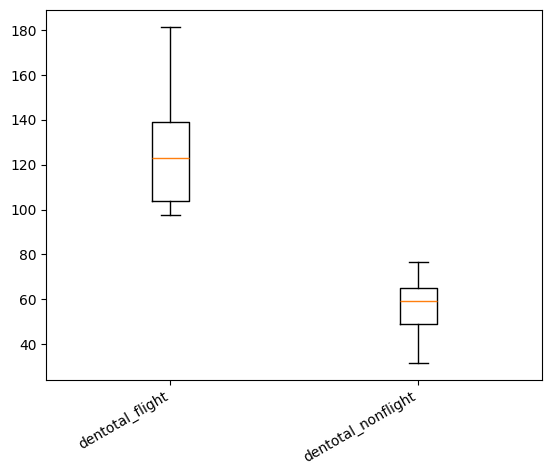

In [14]:
m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='dentotal', treatment=None, space=None, exclude_samples=[])

Plot a box plot for the `denEC` field of the immuno HNE data for ground and spaceflight samples


field:  denEC
excluding samples:  []
{'denEC': {'t-test p-value': 0.0262}}
n flight =  6
n nonflight =  17


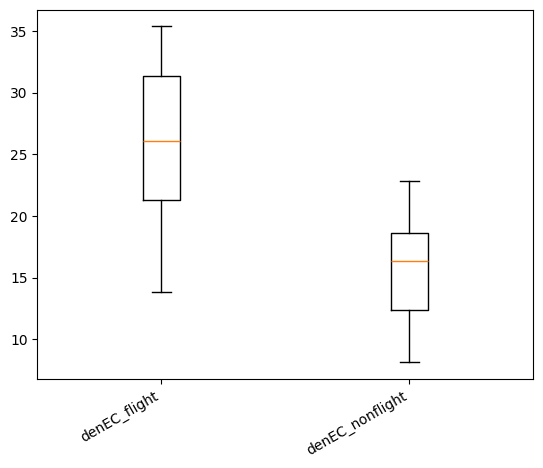

In [15]:
m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='denEC', treatment=None, space=None, exclude_samples=[])

**QUESTIONS**

1. How many flight samples and non-flight samples are in this dataset?

2. Which metric has the lowest p-values?

3. What does high HNE total density infer about the state of a cell?



Double click here to enter your answers to the questions above.

1.6 flight vs 17 non flight

2.dentotal

3.high oxidation stress, prone to chronic diseases

### **Explore the immunostaining microscopy PNA data**

**What is immunostaining PNA?**

[Peanut agglutinin (PNA)](https://en.wikipedia.org/wiki/Peanut_agglutinin) is plant lectin protein derived from the fruits of Arachis hypogaea.  Lectins recognise and bind particular sugar sequences in carbohydrates. The name "peanut agglutinin" originates from its ability to stick together (agglutinate) cells.  In the context of this experiment, PNA is a specific marker for cone photoreceptors and can be used to detect signs of degradation.

https://www.mdpi.com/1422-0067/24/8/7362

**YOUR TURN**

Use the preceding code examples to fill in the TODO's in the cells below.

In [16]:
# TODO: Navigate to the Files section of https://osdr.nasa.gov/bio/repo/data/studies/OSD-557

# TODO: Find the reusable transformed files for PNA immunostaining microscopy

# TODO: uncomment and complete the following command to read in the PNA microscopy data from OSDR-557

# data['immunoPNA'] =

# TODO: print the number of records in the PNA microscopy data set


# TODO: print the list of samples in the PNA microscopy data set


# TODO: print the head of the dataframe of the PNA microscopy data set


In [18]:
data['immunoPNA'] = m.read_phenotype_data('557', 'LSDS-1_immunostaining_microscopy_PNAtr_Transformed_Reusable_Results')
print('num records: ', len(data['immunoPNA']))
print('sample names: ', list(data['immunoPNA']['Sample Name']))
data['immunoPNA'].head()

num records:  10
sample names:  ['F15_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'GC15_Mouse_Eye', 'GC16_Mouse_Eye', 'GC17_Mouse_Eye', 'GC18_Mouse_Eye', 'GC19_Mouse_Eye']


,Source Name,Sample Name,Treatment,totct,totarea,density,Average HNE Fluorescent Intensity
0,F15,F15_Mouse_Eye,Flight,201,0.222335,904.041554,37.552000
1,F17,F17_Mouse_Eye,Flight,260,0.316144,822.409317,48.436333
2,F18,F18_Mouse_Eye,Flight,241,0.205566,1172.370234,34.360333
3,F19,F19_Mouse_Eye,Flight,259,0.286833,902.965714,39.644667
4,F20,F20_Mouse_Eye,Flight,209,0.256673,814.266522,41.274333


*We will examine all the relevant fields (totct, totarea, density, and Average HNE Fluorescent Intensity) to determine if there is a statistically significant difference in the distributions of those data between ground and spaceflight samples.*

field:  totarea
excluding samples:  []
{'totarea': {'t-test p-value': 0.88465}}
n flight =  5
n nonflight =  5


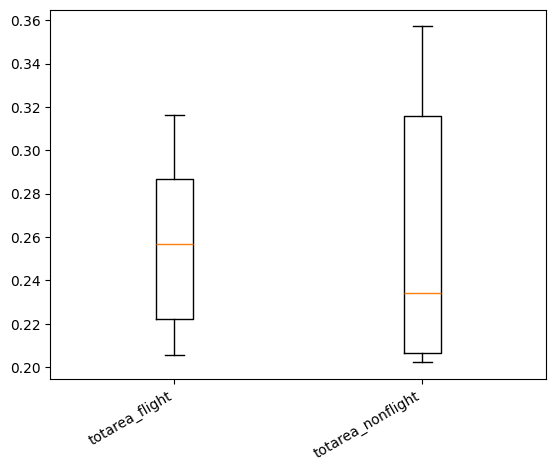

In [21]:
# TODO: plot a box plot of the distributions of totarea for flight and ground samples

m.plotbox_and_stats(data_=data['immunoPNA'], sample_key = 'Source Name', field='totarea', treatment='Treatment', space='Flight', exclude_samples=[])

field:  density
excluding samples:  []
{'density': {'t-test p-value': 0.01739}}
n flight =  5
n nonflight =  5


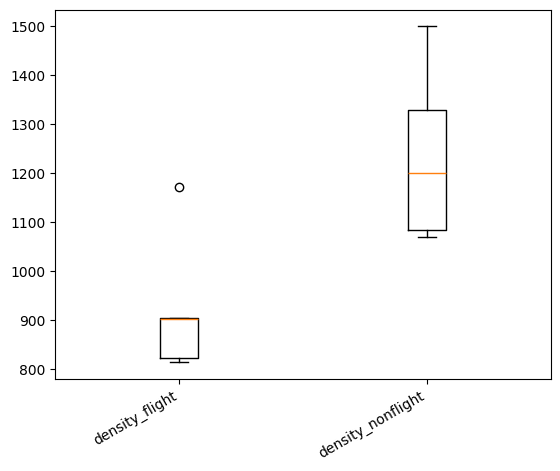

In [22]:
# TODO: plot a box plot of the distributions of density for flight and ground samples
m.plotbox_and_stats(data_=data['immunoPNA'], sample_key = 'Source Name', field='density', treatment='Treatment', space='Flight', exclude_samples=[])

field:  Average HNE Fluorescent Intensity
excluding samples:  []
{'Average HNE Fluorescent Intensity': {'t-test p-value': 0.04793}}
n flight =  5
n nonflight =  5


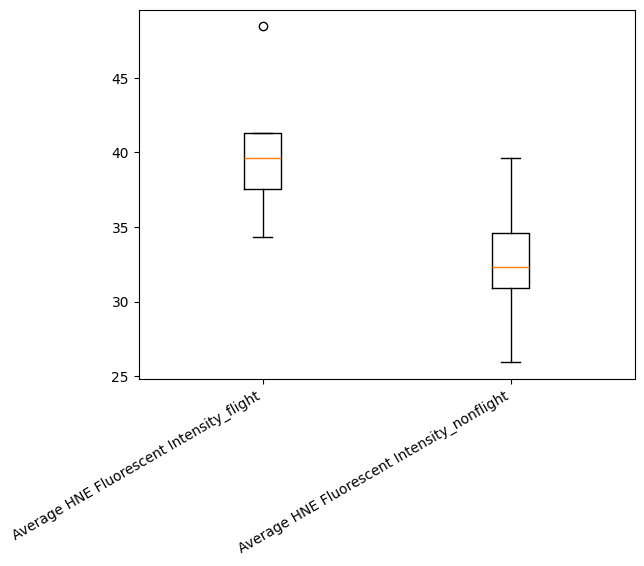

In [25]:
# TODO: plot a box plot of the distributions of Average HNE Fluorescent Intensity for flight and ground samples
m.plotbox_and_stats(data_=data['immunoPNA'], sample_key = 'Source Name', field='Average HNE Fluorescent Intensity', treatment='Treatment', space='Flight', exclude_samples=[])

**QUESTIONS**

1. What do you think the totct, totarea, and density fields refer to in the table?

2. How might the Average HNE Fluorescent Intensity value be measured?

3. Which metric has the most significant distinction between flight and non-flight samples?


**Double click here to enter your answers to the questions above.**

1.totct is the total number of PNA-stained cells or structures observed, such as particular glycoprotein-rich cells, totarea is the entire tissue section area or the area showing PNA-positive staining and density field give you the number of PNA-positive cells or stained structures per unit area

2.average the mean intensities of all ROIs to get an overall Average HNE Fluorescent Intensity

3.density

# **OSD-568 Data Exploration**

The [OSD-568 dataset](https://osdr.nasa.gov/bio/repo/data/studies/OSD-568) contains 3 different assays of microscopy imaging data: one for ZO, one PECAM, and one for TUNEL assays.  We will examine PECAM and TUNEL, each of which are described below.

[Terminal deoxynucleotidyl transferase dUTP nick end labeling](https://en.wikipedia.org/wiki/TUNEL_assay) (TUNEL) is an assay that that detects [apoptotic](https://en.wikipedia.org/wiki/Apoptosis) cells undergoing extensive DNA degredation.  

[Platelet endothelial cell adhesion molecule](https://en.wikipedia.org/wiki/CD31) (PECAM) is a protein that functions as an adhesive stress-response to both maintain cell junctional integrity and speed restoration of [vascular permeability](https://en.wikipedia.org/wiki/Vascular_permeability).

 Immunohistochemical analysis of the retina revealed a strong indication of disturbance of [brain-retinal barrier](https://en.wikipedia.org/wiki/Blood%E2%80%93retinal_barrier) (BRB) integrity. There were also a significant increase in the expression of platelet endothelial cell adhesion molecule-1 (PECAM-1). [Proteomic analysis](https://en.wikipedia.org/wiki/Proteomics) showed that many key proteins and pathways responsible for [cell death](https://en.wikipedia.org/wiki/Cell_death), [cell cycle](https://en.wikipedia.org/wiki/Cell_cycle), [immune response](https://en.wikipedia.org/wiki/Immune_response), [mitochondrial](https://en.wikipedia.org/wiki/Mitochondrion) funcion, and [metabolic](https://en.wikipedia.org/wiki/Metabolism) stress were significantly altered in the flight mice compared to ground control animals. These data indicate a complex cellular response that may alter retina structure and BRB integrity following long-term spaceflight.






## **Explore the TUNEL microscopy data**

Read in data for OSD-568 (LSDS-5_immunostaining_microscopy_TUNELtr TRANSFORMED.csv) and plot box plot of immunostaining microscopy TUNEL Density_EC field for flight and non-flight ssamples



In [26]:
data['immunoMICRO-TUNEL'] = m.read_phenotype_data('568', 'LSDS-5_immunostaining_microscopy_TUNELtr_TRANSFORMED')
print('number of samples: ', len(list(data['immunoMICRO-TUNEL']['Sample_Name'])))
print('samples: ', list(data['immunoMICRO-TUNEL']['Sample_Name']))
data['immunoMICRO-TUNEL'].head()

number of samples:  23
samples:  ['F15_Mouse_Eye', 'F16_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'GC15_Mouse_Eye', 'GC16_Mouse_Eye', 'GC17_Mouse_Eye', 'GC18_Mouse_Eye', 'GC19_Mouse_Eye', 'GC20_Mouse_Eye', 'VG15_Mouse_Eye', 'VG16_Mouse_Eye', 'VG17_Mouse_Eye', 'VG18_Mouse_Eye', 'VG20_Mouse_Eye', 'V15_Mouse_Eye', 'V16_Mouse_Eye', 'V17_Mouse_Eye', 'V18_Mouse_Eye', 'V19_Mouse_Eye', 'V20_Mouse_Eye']


,Sample_Name,Total,Total_EC,Total_Area,Density,Density_EC
0,F15_Mouse_Eye,193,76,1.127330,171.200986,67.415932
1,F16_Mouse_Eye,174,70,1.054249,165.046336,66.397951
2,F17_Mouse_Eye,170,61,1.074499,158.213281,56.770648
3,F18_Mouse_Eye,166,39,1.173785,141.422795,33.225837
4,F19_Mouse_Eye,151,32,1.051339,143.626361,30.437374


field:  Density_EC
excluding samples:  []
{'Density_EC': {'t-test p-value': 0.01726}}
n flight =  6
n nonflight =  17


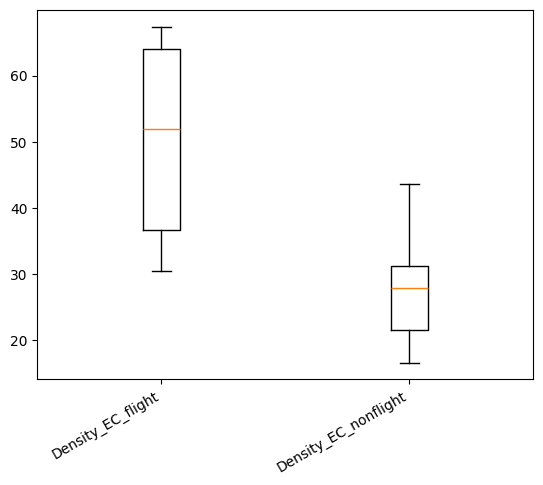

In [27]:
m.plotbox_and_stats(data_=data['immunoMICRO-TUNEL'], sample_key = 'Sample_Name', field='Density_EC', treatment=None, space=None, exclude_samples=[])

## **Explore the PECAM data**
Read in data for OSD-568 (LSDS-5_immunostaining_microscopy_PECAMtr TRANSFORMED.csv) and plot box plot of immunostaining microscopy PECAM Average field for flight and non-flight ssamples



In [28]:
data['immunoMICRO-PECAM'] = m.read_phenotype_data('568', 'LSDS-5_immunostaining_microscopy_PECAMtr_TRANSFORMED')
print('number of samples: ', len(list(data['immunoMICRO-PECAM']['Sample_Name'])))
print('samples: ', list(data['immunoMICRO-PECAM']['Sample_Name']))
data['immunoMICRO-PECAM'].head()

number of samples:  11
samples:  ['F15_Mouse_Eye', 'F16_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'GC15_Mouse_Eye', 'GC16_Mouse_Eye', 'GC17_Mouse_Eye', 'GC18_Mouse_Eye', 'GC19_Mouse_Eye']


,Sample_Name,Average
0,F15_Mouse_Eye,45.0098
1,F16_Mouse_Eye,53.9888
2,F17_Mouse_Eye,37.0548
3,F18_Mouse_Eye,67.0988
4,F19_Mouse_Eye,49.7456


field:  Average
excluding samples:  []
{'Average': {'t-test p-value': 0.02146}}
n flight =  6
n nonflight =  5


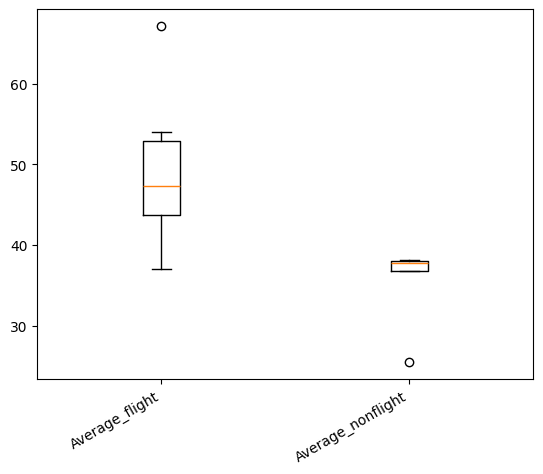

In [29]:
m.plotbox_and_stats(data_=data['immunoMICRO-PECAM'], sample_key = 'Sample_Name', field='Average', treatment=None, space=None, exclude_samples=[])

**QUESTIONS**

1. How many samples have measurements for immunostaining microscopy Zo-1tr? For immunostaining microscopy TUNELtr? For immunostaining microscopy PECAMtr?

2. Which datasets have the largest distinction (smallest p-values) between flight and non-flight samples?

3. What does it mean if a set of samples (either spaceflight or ground control) has, on average, higher values for ZO? For TUNEL? For PECAM?

**Double click here to enter your answers to the questions above.**

1.23 for tunel, 11 for pecam none for Zo

2.tunel

3.it means that the difference between them is statically significant

# **OSD-583 Data Exploration**

Tonometry is the procedure eye care professionals perform to determine the intraocular pressure (IOP), the fluid pressure inside the eye. It is an important test in the evaluation of patients at risk from glaucoma. Most tonometers are calibrated to measure pressure in millimeters of mercury (mmHg), with the normal eye pressure range between 10 and 21 mmHg (13–28 hPa). Rebound tonometers determine intraocular pressure by bouncing a small plastic tipped metal probe against the cornea. As the probe bounces against the cornea and back into the device, it creates an induction current from which the intraocular pressure is calculated. The device is simple and easy to use and self-use versions are available. It is portable, does not require the use of eye drops and is particularly suitable for children and non-cooperative patients like mice.

![](https://www.phenogenomics.cz/files/2021/08/picture-2.jpg)

[The OSD-583 dataset ](https://osdr.nasa.gov/bio/repo/data/studies/OSD-583) provides measurements for [intra-ocular pressure](https://en.wikipedia.org/wiki/Intraocular_pressure) (IOP). Repeated intraocular pressure (IOP) measurements were performed before the flight launch and re-measured before the mice were euthanized after splashdown. Measurements of IOP using the rebound tonometer appeared to be well tolerated by the mice. The animals exhibited no signs of irritation or discomfort during the procedure. Sequential measurements were made to obtain an average of the counts as a single IOP readout for each mouse. This process was repeated three times for each eye.





Read in tonometry transformed data


In [30]:
data['iop'] = m.read_phenotype_data('583', 'LSDS-16_tonometry_maoTRANSFORMED')
print('num samples: ', str(len(list(data['iop']['Sample Name']))))
print('samples: ', list(data['iop']['Sample Name']))
data['iop'].head()

num samples:  100
samples:  ['F1_Mouse_Eye', 'F2_Mouse_Eye', 'F3_Mouse_Eye', 'F4_Mouse_Eye', 'F5_Mouse_Eye', 'F6_Mouse_Eye', 'F7_Mouse_Eye', 'F8_Mouse_Eye', 'F9_Mouse_Eye', 'F10_Mouse_Eye', 'F11_Mouse_Eye', 'F12_Mouse_Eye', 'F13_Mouse_Eye', 'F14_Mouse_Eye', 'F15_Mouse_Eye', 'F16_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'FViv1_CC1_Mouse_Eye', 'FViv2_CC1_Mouse_Eye', 'FViv3_CC1_Mouse_Eye', 'FViv4_CC1_Mouse_Eye', 'FViv5_CC1_Mouse_Eye', 'FViv6_CC1_Mouse_Eye', 'FViv7_CC1_Mouse_Eye', 'FViv8_CC1_Mouse_Eye', 'FViv9_CC1_Mouse_Eye', 'FViv10_CC1_Mouse_Eye', 'FViv11_CC1_Mouse_Eye', 'FViv12_CC1_Mouse_Eye', 'FViv13_CC1_Mouse_Eye', 'FViv14_CC1_Mouse_Eye', 'FViv15_CC1_Mouse_Eye', 'FViv16_CC1_Mouse_Eye', 'FViv17_CC1_Mouse_Eye', 'FViv18_CC1_Mouse_Eye', 'FViv19_CC1_Mouse_Eye', 'FViv20_CC1_Mouse_Eye', 'GC1_Mouse_Eye', 'GC2_Mouse_Eye', 'GC3_Mouse_Eye', 'GC4_Mouse_Eye', 'GC5_Mouse_Eye', 'GC6_Mouse_Eye', 'GC7_Mouse_Eye', 'GC8_Mouse_Eye', 'GC9_Mouse_Eye', 'GC10_Mouse_Eye'

,Source Name,Sample Name,Factor Value: Spaceflight,Left_1,Left_2,Left_3,Avg_Left,Right_1,Right_2,Right_3,Avg_Right,time_Start,Time_End
0,F1,F1_Mouse_Eye,Space Flight,19,16,18,17.666667,18,18,15,17.000000,2:46,2:48
1,F2,F2_Mouse_Eye,Space Flight,17,16,16,16.333333,16,16,15,15.666667,2:55,2:58
2,F3,F3_Mouse_Eye,Space Flight,16,18,15,16.333333,17,19,17,17.666667,2:32,2:34
3,F4,F4_Mouse_Eye,Space Flight,18,15,16,16.333333,18,16,15,16.333333,2:15,2:17
4,F5,F5_Mouse_Eye,Space Flight,18,18,16,17.333333,14,16,14,14.666667,2:20,2:22


*We will be measuring the difference in distributions of the `Avg_Left` and `Avg_Right` samples measurements between flight and non-flight samples.*

## **Explore the Avg_Left tonometry**

Plot a box plot for the Avg_Left field of the tonometry data for ground and spaceflight samples


field:  Avg_Left
excluding samples:  []
{'Avg_Left': {'t-test p-value': 0.04627}}
n flight =  20
n nonflight =  80


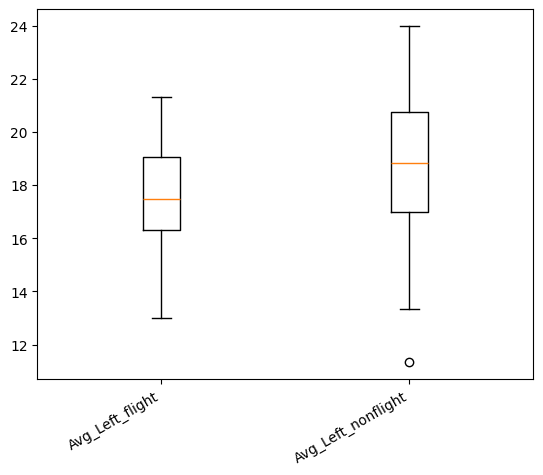

In [31]:
m.plotbox_and_stats(data_=data['iop'], sample_key = 'Source Name', field='Avg_Left', treatment='Factor Value: Spaceflight', space="Space Flight", exclude_samples=[])

## **Explore the Avg_Right tonometry**

Plot a box plot for the Avg_Right field of the tonometry data for ground and spaceflight samples


field:  Avg_Right
excluding samples:  []
{'Avg_Right': {'t-test p-value': 0.00054}}
n flight =  20
n nonflight =  80


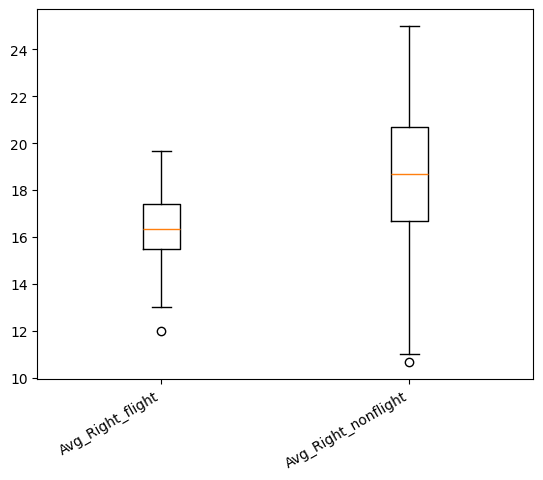

In [32]:
m.plotbox_and_stats(data_=data['iop'], sample_key = 'Source Name', field='Avg_Right', treatment='Factor Value: Spaceflight', space="Space Flight", exclude_samples=[])

**QUESTIONS**

1. How many samples are in the flight group and the non-flight group?

2. Are the `Avg_Left` and `Avg_Right` distributions comparably dissimilar between flight and non-flight samples?

3. How might you use both `Avg_Left` and `Avg_Right` values to create a single metric for machine learning modeling?

**Double click here to enter your answers to the questions above.**

1.20 vs 80

2.not very dissimilar, almost close to median

3.take average of both eyes and their vales